In [17]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob  
import plotly.express as px

In [19]:
# uploading the data and changing the data types 
netflix = pd.read_csv(r"I:\netflix_titles.csv",index_col = "show_id")
netflix["type"] = netflix["type"].astype("category")
netflix["date_added"] = netflix["date_added"].astype("datetime64[s]")


<Axes: ylabel='count'>

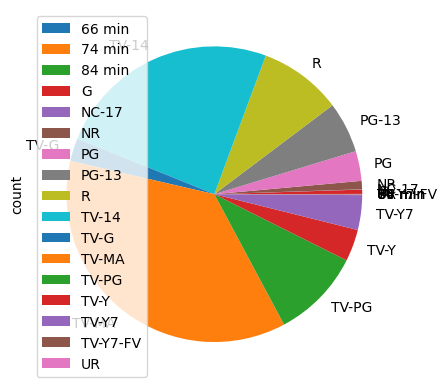

In [20]:
# Nextflix rating plotted on a pie chart
netflix.columns
ratings = netflix.groupby("rating").size().reset_index(name = "count")
ratings = ratings.set_index("rating")
ratings.plot(kind = "pie", x = "rating", y = "count")

<Axes: xlabel='director'>

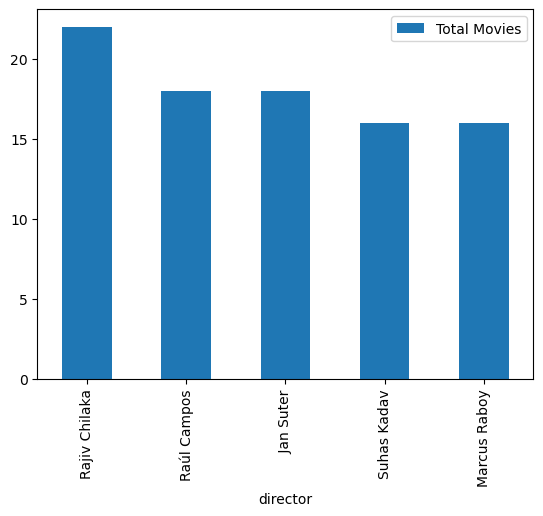

In [22]:
# Plotting  top 5 directors who produced more films
netflix["director"] = netflix["director"].dropna(how = "all")
dff = netflix["director"].str.split(",",expand = True).stack().to_frame()
dff.columns = ["director"]
directors = dff.set_index("director")
directors_movie = directors.groupby(["director"]).size().reset_index(name = "Total Movies")
final_directors = directors_movie.sort_values("Total Movies", ascending = False).set_index("director").head()
final_directors.plot(kind = "bar", y = "Total Movies")

<Axes: ylabel='Cast'>

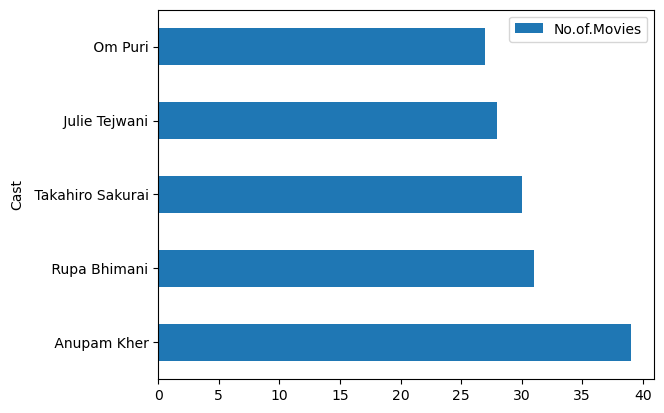

In [25]:
# Plotting  top 5 actprs who acted in  more films
netflix["cast"] = netflix["cast"].dropna(how = "all")
netflix_dup = netflix["cast"].str.split(",", expand = True).stack().to_frame().set_index(0).reset_index(names = "Cast")
Casting = netflix_dup.groupby(["Cast"]).size().sort_values(ascending = False).to_frame()
Casting.rename(mapper = {0: "No.of.Movies"}, axis = "columns", inplace = True)
sort_cast = Casting.sort_values("No.of.Movies", ascending = False).head()
sort_cast.plot(kind = "barh")

C:\Users\ashraf\AppData\Local\Temp\ipykernel_11032\1208955429.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='release_year'>

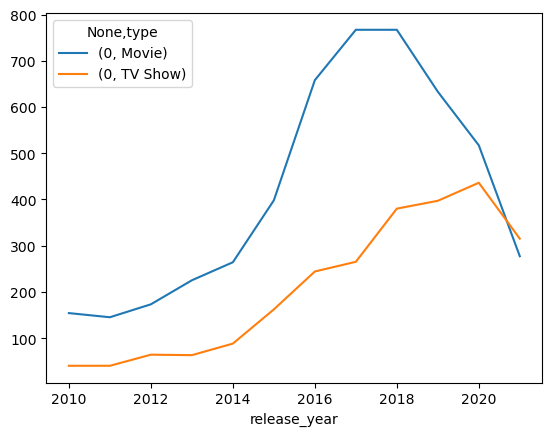

In [27]:
# trend of movies and TV shows from 2010
netflix["release_year"] = netflix["release_year"].astype("int")
netflix1 = netflix[netflix['release_year']>= 2010]
trend = netflix1[["release_year", "type"]].set_index(["release_year"])
main_trend = trend.groupby(["release_year", "type"]).size().to_frame()
main_trend
main = main_trend.unstack()
main.plot(kind ='line')

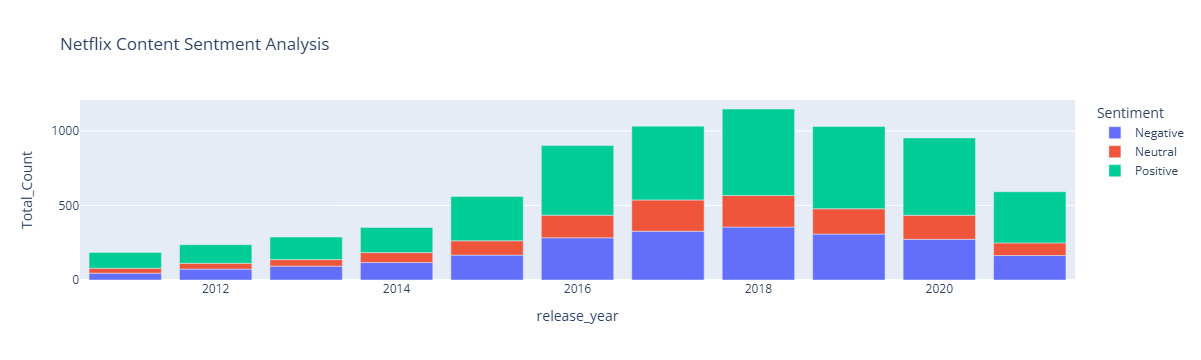

In [29]:
# Sentiment on content of Netflix
netflix_yd = netflix[["release_year", "description"]]
for index,row in netflix_yd.iterrows():
    descriptions = row["description"]
    p_desc = TextBlob(descriptions)
    p = p_desc.sentiment.polarity
    if p > 0:
        var = "Positive"
    elif p == 0:
        var = "Neutral"
    else:
        var = "Negative"
    netflix_yd.loc[index, "Sentiment"] = var
netflix_yd = netflix_yd[netflix_yd["release_year"] > 2010]
netflix_sentiments =netflix_yd.groupby(["release_year", "Sentiment"]).size().reset_index(name = "Total_Count")
fig = px.bar(netflix_sentiments, x = "release_year", y = "Total_Count", color = "Sentiment", title = "Netflix Content Sentment Analysis")
fig.show()